<a href="https://colab.research.google.com/github/chaurasiauttkarsh/Machine-Learning/blob/master/6_2_Data_Engineering_Engineering_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Binning, Discretization, Linear Models, and Trees**

Linear models and tree-based models (such as decision trees, gradient boosted trees, and random forests), two large and very commonly used families, have very different properties when it comes to how they work with different feature representations.

In [1]:
!pip install mglearn
import mglearn

     |████████████████████████████████| 542kB 4.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=166a3a1d274b6f1bf5a49f81438420b0cba19f43ce13387cfd683df9a4a8da53
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


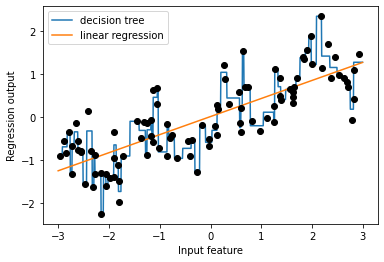

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import numpy as np
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y) 
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k') 
plt.ylabel("Regression output") 
plt.xlabel("Input feature") 
plt.legend(loc="best")

**Binning(Discretization)**

As you know, linear models can only model linear relationships, which are lines in the case of a single feature. The decision tree can build a much more complex model of the data. However, this is strongly dependent on the representation of the data. One way to make linear models more powerful on continuous data is to use binning (also known as discretization) of the feature to split it up into multiple features.

We imagine a partition of the input range for the feature (in this case, the numbers from –3 to 3) into a fixed number of bins—say, 10. A data point will then be represented by which bin it falls into. To determine this, we first have to define the bins. In this case, we’ll define 10 bins equally spaced between –3 and 3. We use the np.linspace function for this, creating 11 entries, which will create 10 bins—they are the spaces in between two consecutive boundaries:

In [3]:
bins = np.linspace(-3, 3, 11)
print("Bins : {}".format(bins))

Bins : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


Here, the first bin contains all data points with feature values –3 to –2.4, the second bin contains all points with feature values from –2.4 to –1.8, and so on.

Next, we record for each data point which bin it falls into. This can be easily computed using the np.digitize function:

In [4]:
which_bins = np.digitize(X, bins=bins)
print(X[:5])
print(which_bins[:5])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
[[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


What we did here is transform the single continuous input feature in the wave dataset into a categorical feature that encodes which bin a data point is in. To use a scikit- learn model on this data, we transform this discrete feature to a one-hot encoding using the OneHotEncoder from the preprocessing module. The OneHotEncoder does the same encoding as pandas.get_dummies, though it currently only works on categorical variables that are integers:

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bins)
X_binned = encoder.transform(which_bins)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [6]:
print(X.shape)
print(X_binned.shape)

(100, 1)
(100, 10)


Training both the models on X_binned and testing on line_binned

Text(0.5, 0, 'Input feature')

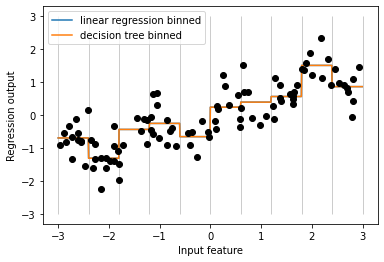

In [7]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y) 
plt.plot(line, reg.predict(line_binned), label='decision tree binned') 

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best") 
plt.ylabel("Regression output") 
plt.xlabel("Input feature")

The dashed line and solid line are exactly on top of each other, meaning the linear regression model and the decision tree make exactly the same predictions. For each bin, they predict a constant value. As features are constant within each bin, any model must predict the same value for all points within a bin. Comparing what the models learned before binning the features and after, we see that the linear model became much more flexible, because it now has a different value for each bin, while the decision tree model got much less flexible. Binning features generally has no beneficial effect for tree-based models, as these models can learn to split up the data anywhere. In a sense, that means decision trees can learn whatever binning is most useful for predicting on this data. Additionally, decision trees look at multiple features at once, while binning is usually done on a per-feature basis. However, the linear model benefited greatly in expressiveness from the transformation of the data.

**Interactions and Polynomials**

**Interactions**

Another way to enrich a feature representation, particularly for linear models, is adding interaction features and polynomial features of the original data. This kind of feature engineering is often used in statistical modeling, but it’s also common in many practical machine learning applications.

One way to add a slope to the linear model on the binned data is to add the original feature (the x-axis in the plot) back in. This leads to an 11- dimensional dataset.

In [8]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


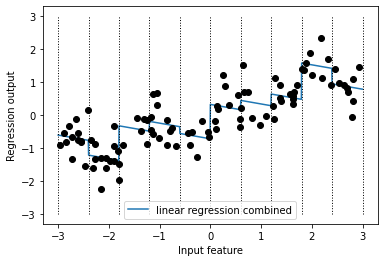

In [9]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')
for bin in bins:
  plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.legend(loc="best") 
plt.ylabel("Regression output") 
plt.xlabel("Input feature") 
plt.plot(X[:, 0], y, 'o', c='k')

In this example, the model learned an offset for each bin, together with a slope. The learned slope is downward, and shared across all the bins—there is a single x-axis feature, which has a single slope. Because the slope is shared across all bins, it doesn’t seem to be very helpful. We would rather have a separate slope for each bin! We can achieve this by adding an interaction or product feature that indicates which bin a data point is in and where it lies on the x-axis. This feature is a product of the bin indicator and the original feature.

In [10]:
X_product = np.hstack([X_binned, X * X_binned]) 
print(X_product.shape)

(100, 20)


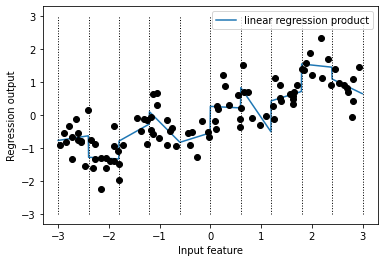

In [11]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product') 
for bin in bins:
  plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.plot(X[:, 0], y, 'o', c='k') 
plt.ylabel("Regression output") 
plt.xlabel("Input feature") 
plt.legend(loc="best")

**Polynomials**

Using binning is one way to expand a continuous feature. Another one is to use polynomials of the original features. For a given feature x, we might want to consider x ** 2, x ** 3, x ** 4, and so on. This is implemented in PolynomialFeatures in the preprocessing module:

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 10, include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)

In [13]:
print(X_poly.shape)

(100, 10)


In [14]:
print("Entries of X:\n{}".format(X[:5])) 
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


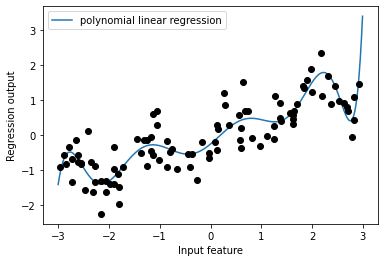

In [15]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression') 
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")


As you can see, polynomial features yield a very smooth fit on this one-dimensional data. However, polynomials of high degree tend to behave in extreme ways on the boundaries or in regions with little data.

As a comparison, here is a kernel SVM model learned on the original data, without any transformation.

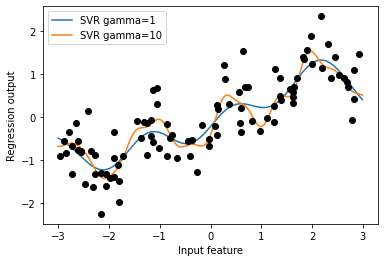

In [16]:
from sklearn.svm import SVR
for gamma in [1, 10]:
  svr = SVR(gamma=gamma).fit(X, y)
  plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.plot(X[:, 0], y, 'o', c='k') 
plt.ylabel("Regression output") 
plt.xlabel("Input feature") 
plt.legend(loc="best")


Using a more complex model, a kernel SVM, we are able to learn a similarly complex prediction to the polynomial regression without an explicit transformation of the features.

As a more realistic application of interactions and polynomials, let’s look again at the Boston Housing dataset.

In [20]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)


from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


The data originally had 13 features, which were expanded into 105 interaction features. These new features represent all possible interactions between two different original features, as well as the square of each original feature. degree=2 here means that we look at all features that are the product of up to two original features.

In [21]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


Let’s compare the performance using Ridge on the data with and without interactions:

In [24]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train) 
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train) 
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


Clearly, the interactions and polynomial features gave us a good boost in performance when using Ridge. When using a more complex model like a random forest, the story is a bit different, though:

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train) 
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train) 
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.793
Score with interactions: 0.768


You can see that even without additional features, the random forest beats the performance of Ridge. Adding interactions and polynomials actually decreases performance slightly.